Collecting and Cleaning the Land and Sea anomoly data to understand the trend of climate change

In [98]:
#Data Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
#Import the Data of Land Temperature in Celsius
df_land=pd.read_csv("../raw_data/data/Climate Data/Global Land Temperature Anomalies.csv")
df_land.head(3)

,Year,Value
0,199501,1.04
1,199502,1.59
2,199503,0.82


In [100]:
#Import the Ocean Surface Temperature in Celsius
df_ocean=pd.read_csv("../raw_data/data/Climate Data/Global Ocean Temperature Anomalies.csv")
df_ocean.head(3)

,Year,Value
0,199501,0.38
1,199502,0.41
2,199503,0.38


In [101]:
#Rename the Colummns
df_ocean['Ocean Temperature']=df_ocean['Value']
df_ocean.drop(columns='Value',inplace=True)

df_land['Land Temperature']=df_land['Value']
df_land.drop(columns='Value',inplace=True)

In [102]:
#Convert each into pd Datetime
df_land['Year'] = pd.to_datetime(df_land['Year'], format='%Y%m')
df_land.set_index('Year', inplace=True)

df_ocean['Year'] = pd.to_datetime(df_ocean['Year'], format='%Y%m')
df_ocean.set_index('Year', inplace=True)

<AxesSubplot: xlabel='Year'>

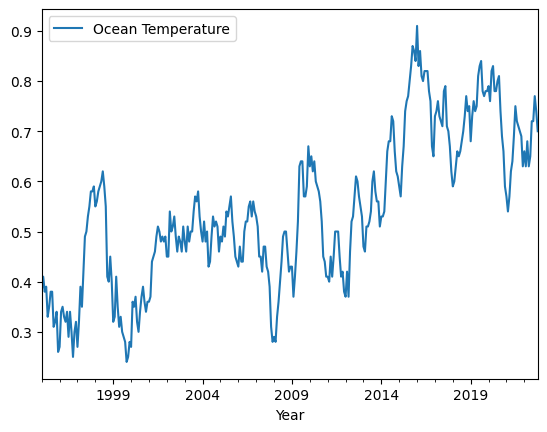

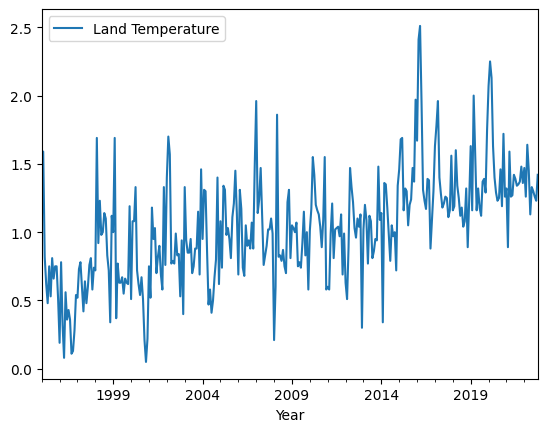

In [103]:
#Plotting what we have now
df_ocean.plot()
df_land.plot()

            Temperature
time                   
1995-01-01     1.040000
1995-01-02     1.111744
1995-01-03     1.178854


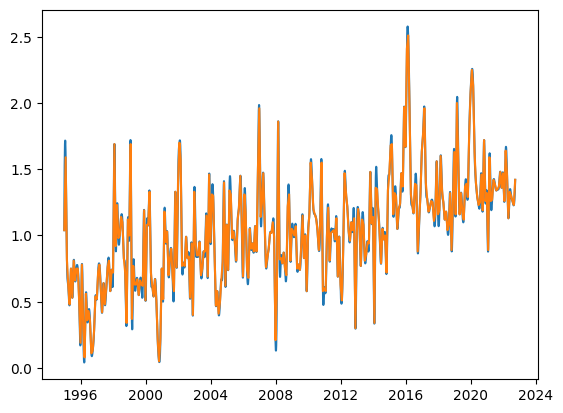

In [107]:
datetime_index = pd.date_range(start="1995-01-01", end="2022-10-01", name="time")
land=pd.DataFrame(index=datetime_index)
land['Temperature']=df_land['Land Temperature']
land.interpolate(method='polynomial', order=3, inplace=True)


print(land.head(3))


plt.plot(land)
plt.plot(df_land)

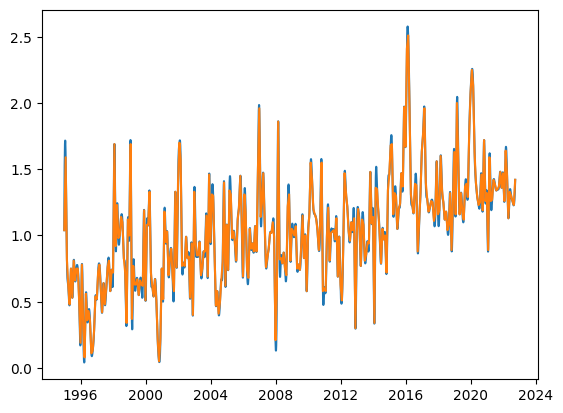

In [108]:
plt.plot(land)
plt.plot(df_land)

            Temperature
time                   
1995-01-01     0.380000
1995-01-02     0.384063
1995-01-03     0.387851


<AxesSubplot: xlabel='Year'>

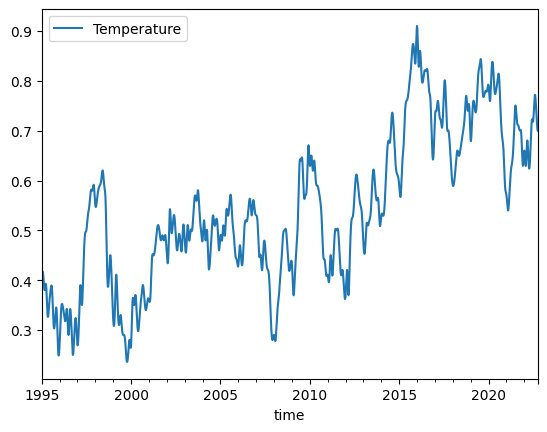

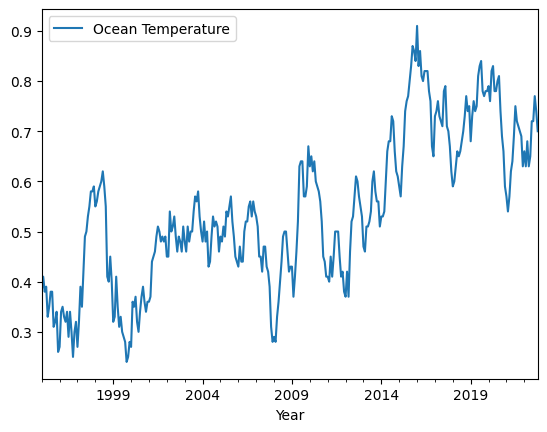

In [106]:
datetime_index = pd.date_range(start="1995-01-01", end="2022-10-01", name="time")
ocean=pd.DataFrame(index=datetime_index)
ocean['Temperature']=df_ocean['Ocean Temperature']
ocean.interpolate(method='polynomial', order=3, inplace=True)


print(ocean.head(3))

ocean.plot()
df_ocean.plot()

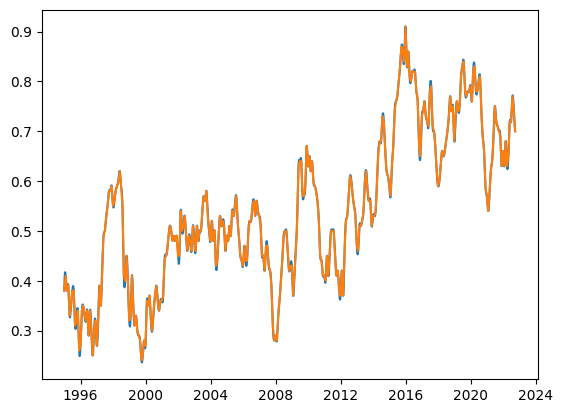

In [109]:
plt.plot(ocean)
plt.plot(df_ocean)

In [118]:
#Renaming the columns
land['Land Temperature']=land['Temperature']
land.drop('Temperature', axis=1, inplace=True)
land

,Land Temperature
time,
1995-01-01,1.040000
1995-01-02,1.111744
1995-01-03,1.178854
1995-01-04,1.241437
1995-01-05,1.299601
...,...
2022-09-27,1.371649
2022-09-28,1.382928
2022-09-29,1.394739


In [120]:
land['Ocean Temperature']=ocean['Temperature']

In [123]:
surface_temp=land

<AxesSubplot: xlabel='time'>

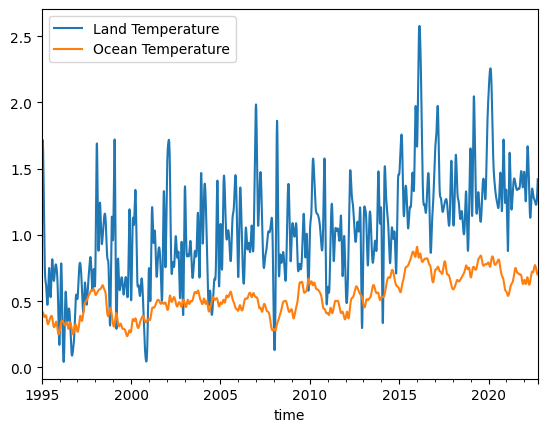

In [124]:
surface_temp.plot()

In [125]:
surface_temp.to_csv("../raw_data/data/Climate Data/cleaned_ocean_land_temp.csv")